# **Customer Personality Analysis**
*STAT301: Statistical Modelling for Data Science*

By: Andy Hu, Cathy Lei, Yupei Qiu

April 12, 2025

<img src="https://raw.githubusercontent.com/andyh031/stat301-project/main/images/image.png" alt="intro picture of customer personality analysis" width="300"/>

<!-- Start with relevant background information on the topic to prepare those unfamiliar for the rest of your proposal.

Formulate one or two questions for investigation and detail the dataset that will be utilized to address these questions.

Additionally, align your question/objectives with the existing literature. To contextualize your study, include a minimum of two scientific publications (these should be listed in the References section). -->

# Introduction
Understanding how customer details and behaviors at the company influence purchasing decisions is a critical area of research in marketing and business analytics. In order to optimize marketing strategies and understand how to target specific customers to make the most profit, companies are increasingly leveraging customer personality analysis. Some crucial tasks in doing so include personalized recommendations, and analysis into customer churn and retention. Analyzing key attributes such as demographics, personal details, lifestyle preferences, and engagement with the company can uncover more effective strategies to boost sales and customer satisfaction.

With the rise of big data and machine learning in the past couple of years, the significance of consumer analytics has become apparent. Companies can now leverage vast amounts of customer data to make data-driven decisions rather than relying solely on traditional marketing intuition on what type of products or strategies work well (Rodriguez-Serrano, 2025).

Prior research has shown how psychographic segmentation like personality traits, values, and interests influence consumer decision-making (Plouffe et al., 2016). This study aims to contribute to the growing field of customer analytics by providing actionable insights for businesses looking to enhance their marketing and sales strategies.

## Data Description

The data came from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/discussion/295952) and describes a business' customer personalities. This data helps a business understand the needs of its customers better and dynamically change their marketing strategies to target specific types of customers. This is an observational study because the business collected data on its customers' behavior without actively manipulating any variables or assigning treatments.

There are 2240 observations and 29 covariates/columns in the dataset. A description of these 29 covariates is below:


**Table 1: Description of Dataset Covariates**
| Covariate Name | Description | Type |
| ------- | ----------- | - |
| ID | Customer's unique identifier | Numeric |
| Year_Birth | Customer's birth year | Numeric |
| Education | Customer's education level | Categorical |
| Marital_Status | Customer's marital status | Categorical |
| Income | Customer's yearly household income | Numeric |
| Kidhome | Number of children in customer's household | Numeric |
| Teenhome | Number of teenagers in customer's household | Numeric |
| Dt_Customer | Date of customer's enrollment with the company | Character |
| Recency | Number of days since customer's last purchase | Numeric |
| Complain | 1 if the customer complained in the last 2 years, 0 otherwise | Categorical |
| MntWines| Amount spent on wine in last 2 years | Numeric |
| MntFruits| Amount spent on fruits in last 2 years | Numeric |
| MntMeatProducts| Amount spent on meat in last 2 years | Numeric |
| MntFishProducts| Amount spent on fish in last 2 years | Numeric |
| MntSweetProducts| Amount spent on sweets in last 2 years | Numeric |
| MntGoldProds| Amount spent on gold in last 2 years | Numeric |
| NumDealsPurchases | Number of purchases made with a discount | Numeric |
| AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise | Binary |
| AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise | Binary |
| AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise | Binary |
| AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise | Binary |
| AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise | Binary |
| Response | 1 if customer accepted the offer in the last campaign, 0 otherwise | Binary |
| NumWebPurchases | Number of purchases made through the company’s website | Numeric |
| NumCatalogPurchases | Number of purchases made using a catalogue | Numeric |
| NumStorePurchases | Number of purchases made directly in stores | Numeric |
| NumWebVisitsMonth | Number of visits to company’s website in the last month | Numeric |

## Pre-Selection of Variables
We can drop the `ID` field because it is just a unique identifier that will be unused for our model predictions. There are two more columns, `Z_CostContact` and `Z_Revenue`, which can be dropped as they have the same value for all data points, meaning they are completely collinear and irrelevant for both inference and prediction.
<!-- We may also drop the variables related to the campaign (`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Response`) as they are irrelevant to our analysis.  -->

## Question

Is a customer's personal details and history at the company associated with the amount of web purchases they make on the company's website?

> **Response Variable:** `NumWebPurchases`

> **Covariates:** `Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Complain, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth`

The primary focus of this project will be on inference, although this question involves both inference and prediction. It is an inference problem because we aim to identify relationships between customer characteristics and history at the company with their number of web purchases at the company. At the same time, it can be used for prediction by estimating the expected number of web purchases a new customer might make based on different customer characteristics. Ideally, we would like to have a simple model so that we can do inference on it easily, while still being able to output substantial predictive power should we wish to use it for prediction.

# Methods and Results

In [1]:
# Imports
suppressMessages({
  library(tidyverse)
  library(repr)
  library(infer)
  library(cowplot)
  library(broom)
  library(tidymodels)
  library(mltools)
  library(leaps)
  library(modelr)
  library(glmnet)
  library(car)
  library(patchwork)
})

## Exploratory Data Analysis and Visualization

### General Steps
- Drop irrelevant columns (`ID`, `Z_CostContact`, `C_Revenue`)
- Drop any rows with NA values
- Identify and drop any outliers
- Visualize results

In [2]:
# Contributors: Andy

# Read the tsv file from the data folder
data = read_tsv("https://raw.githubusercontent.com/andyh031/stat301-project/refs/heads/main/data/marketing_campaign.csv", show_col_types = FALSE)

# Display a chunk of the data
head(data)

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


First, we can drop the columns `ID`, `Z_CostContact`, and `Z_Revenue` as mentioned in our pre-selection of variables

In [3]:
# Contributors: Andy

# Drop irrelevant columns by selecting all columns but the drop_columns
drop_columns = c("ID", "Z_CostContact", "Z_Revenue")
data <- data |>
    select(-all_of(drop_columns))

We want to make the columns that are binary and categorical, which are currently being represented as numeric, into factors so R knows they are not actually numeric columns. We also encode the date field as a date type in R.

In [4]:
# Contributors: Andy

# Change categorical columns (currently represented as numerical) to factors
factor_cols = c("Education", "Marital_Status", "Complain", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response")
data[factor_cols] <- lapply(data[factor_cols], as.factor)

# Encode Date column into an R date type
data$Dt_Customer <- as.Date(data$Dt_Customer, format = "%d-%m-%Y")
head(data)

Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,⋯,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,⋯,10,4,7,0,0,0,0,0,0,1
1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,⋯,1,2,5,0,0,0,0,0,0,0
1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,⋯,2,10,4,0,0,0,0,0,0,0
1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,⋯,0,4,6,0,0,0,0,0,0,0
1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,⋯,3,6,5,0,0,0,0,0,0,0
1967,Master,Together,62513,0,1,2013-09-09,16,520,42,⋯,4,10,6,0,0,0,0,0,0,0


Let us observe where we have NA values.

In [5]:
# Contributors: Andy

# Get count of NA values in each column
na_count <- lapply(data, function(x) sum(is.na(x)))
na_count

$Year_Birth
[1] 0

$Education
[1] 0

$Marital_Status
[1] 0

$Income
[1] 24

$Kidhome
[1] 0

$Teenhome
[1] 0

$Dt_Customer
[1] 0

$Recency
[1] 0

$MntWines
[1] 0

$MntFruits
[1] 0

$MntMeatProducts
[1] 0

$MntFishProducts
[1] 0

$MntSweetProducts
[1] 0

$MntGoldProds
[1] 0

$NumDealsPurchases
[1] 0

$NumWebPurchases
[1] 0

$NumCatalogPurchases
[1] 0

$NumStorePurchases
[1] 0

$NumWebVisitsMonth
[1] 0

$AcceptedCmp3
[1] 0

$AcceptedCmp4
[1] 0

$AcceptedCmp5
[1] 0

$AcceptedCmp1
[1] 0

$AcceptedCmp2
[1] 0

$Complain
[1] 0

$Response
[1] 0

It seems that Income has NA values, so we will simply delete these rows from our dataset. This should not pose a big problem given the large size of our dataset, meaning 24 deleted rows is not much.

In [6]:
# Contributors: Andy

# Remove any rows with NAs from the dataset
data <- data |> drop_na()

In [7]:
# Contributors: Andy

summary(data$Income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1730   35303   51382   52247   68522  666666 

There seems to be a huge outlier in the income field, so let us remove it.

In [8]:
# Contributors: Andy

# Remove the max outlier in Income
data <- data[data$Income != max(data$Income, na.rm = T), ]

`geom_smooth()` using formula = 'y ~ x'


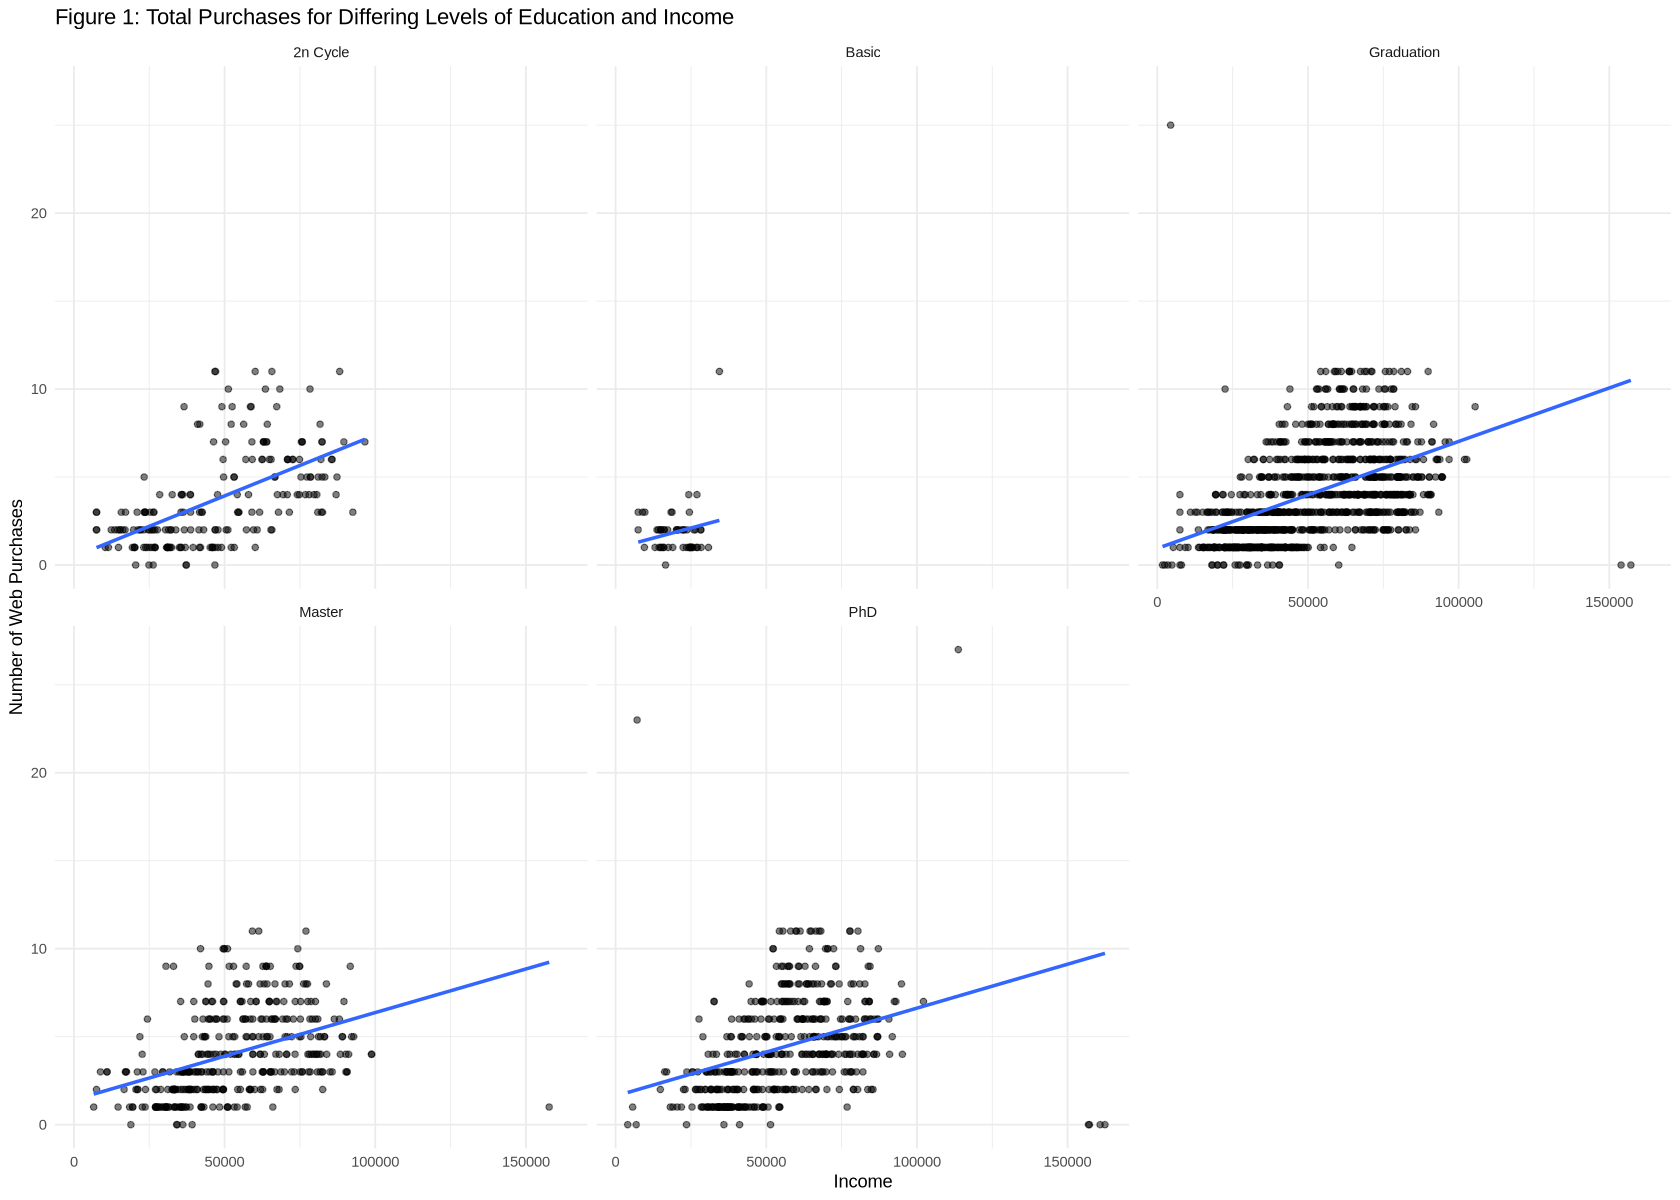

In [9]:
# Contributors: Andy

# Scatter Plot: Number of Web Purchases vs Income
options(repr.plot.width = 14, repr.plot.height = 10)

ggplot(data, aes(x = Income, y = NumWebPurchases)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
      title = "Figure 1: Total Purchases for Differing Levels of Education and Income",
      x = "Income",
      y = "Number of Web Purchases"
  ) +
  theme_minimal() +
  facet_wrap(~Education)

From the plot, we can tell that there are outliers in our response variable, NumWebPurchases with three total points in total being above 20 (two in the PhD plot, one in the Graduation plot). It also seems like there are outliers in Income greater than $150000. We can remove them and replot our visualization to better understand the relationship between web purchase and income and education levels.

`geom_smooth()` using formula = 'y ~ x'


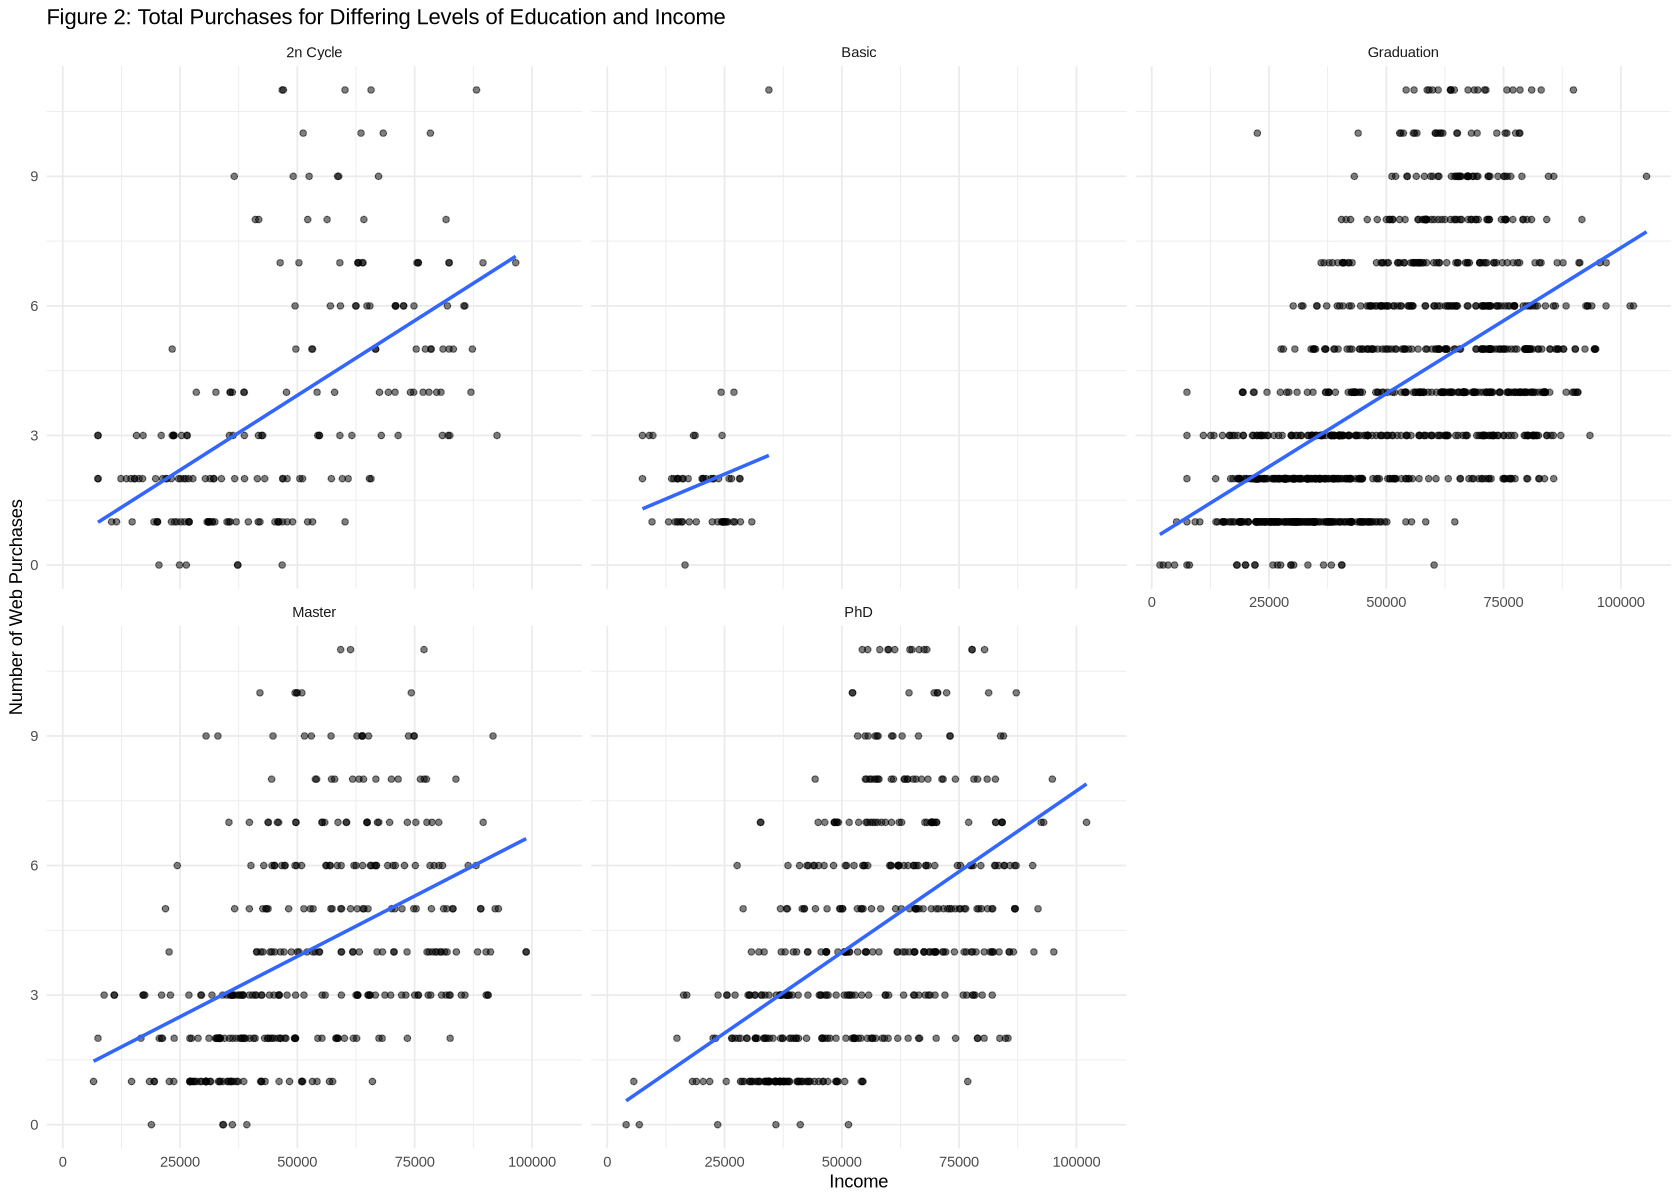

In [10]:
# Contributors: Andy

# Remove the outliers in Income and Web Purchases
data <- data[data$Income < 150000, ]
data <- data[data$NumWebPurchases < 20, ]

# Scatter Plot: Number of Web Purchases vs Income
ggplot(data, aes(x = Income, y = NumWebPurchases)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Figure 2: Total Purchases for Differing Levels of Education and Income",
       x = "Income",
       y = "Number of Web Purchases"
      ) +
  theme_minimal() +
  facet_wrap(~Education)

This plot is important to the analysis of our research question because it compares the continous variable Income, one of our chosen covariates, to the number of web purchases a customer makes (the response), shown for different levels of education that the customer has, which is another one of our covariates. This can be modelled through poisson regression as we are predicting a mean count of purchases. We see a linear relationship between total number of web purchases and income for most of the categories of education, although it does seem like there is not much association for the PhD education level. The range of income for basic education is way smaller than compared to the other levels of Education. All plots are on the same scale, and it seems that the slope for different levels of education are relatively the same, indicating that there may not be any significant effects between Education level and our response, the number of web purchases.

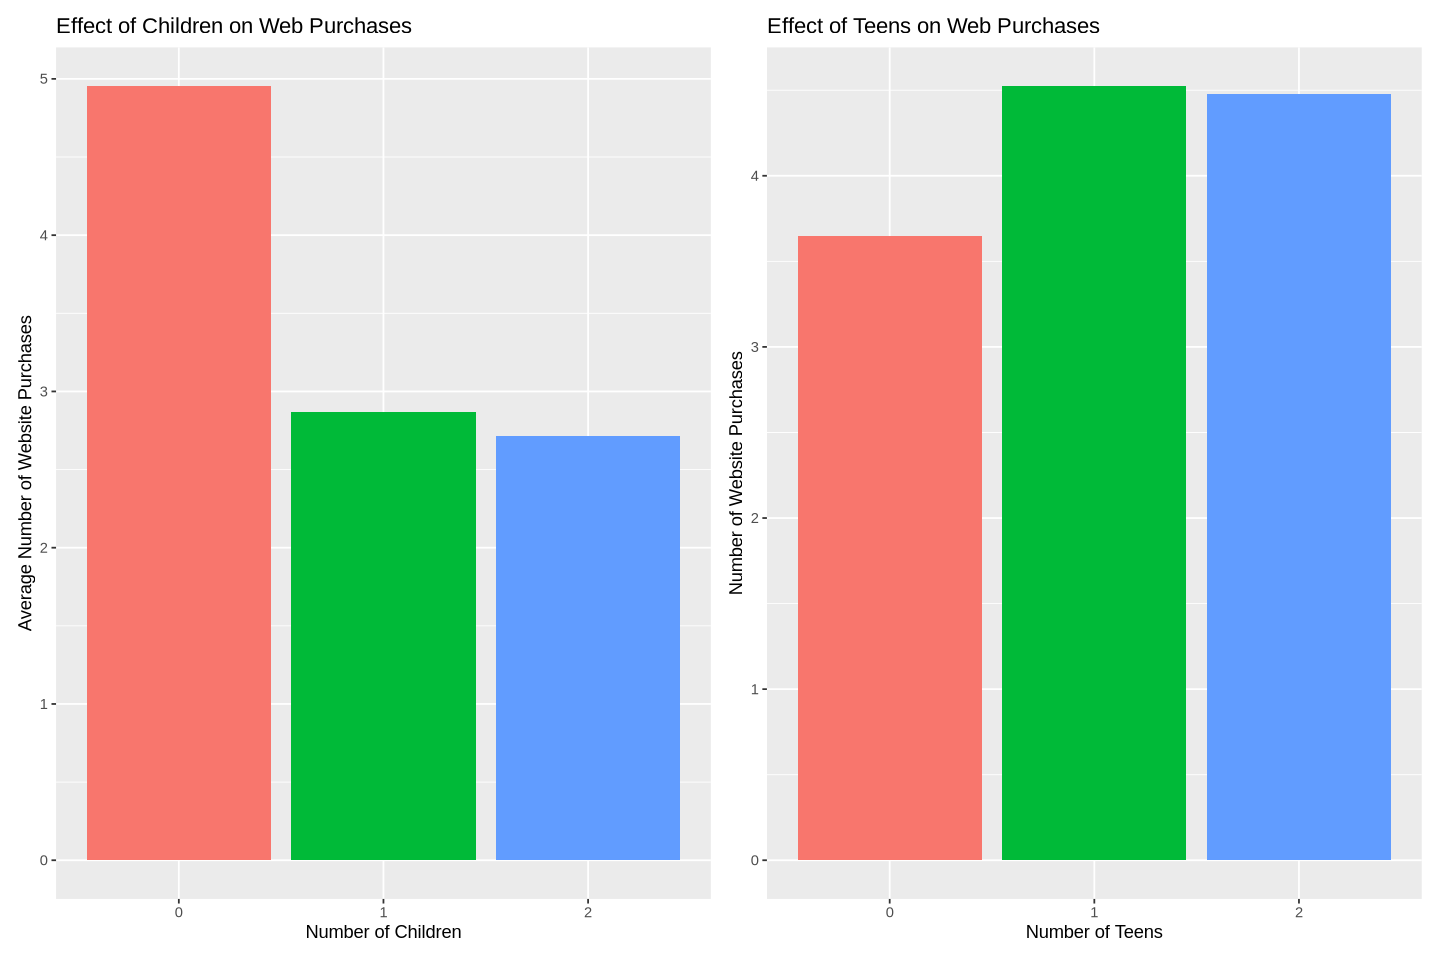

In [11]:
# Contributors: Cathy

options(repr.plot.width = 12, repr.plot.height = 8)

# Bar chart for average number of website purchases vs. number of children
web_purchases_kids <-
    data %>%
    ggplot(aes(x = as.factor(Kidhome), y = NumWebPurchases, fill = as.factor(Kidhome))) +
      stat_summary(fun = mean, geom = "bar") +
      labs(x = "Number of Children", y = "Average Number of Website Purchases", 
           title = "Effect of Children on Web Purchases") +
      theme(legend.position = "none")

# Bar chart for average number of website purchases vs. number of teens
web_purchases_teens <- 
    data %>%
    ggplot(aes(x = as.factor(Teenhome), y = NumWebPurchases, fill = as.factor(Teenhome))) +
      stat_summary(fun = mean, geom = "bar") +
      labs(x = "Number of Teens", y = "Number of Website Purchases",
           title = "Effect of Teens on Web Purchases") +
      theme(legend.position = "none")

# Combine both plots into one
web_purchases_kids + web_purchases_teens


These two plots are important because it compares two other chosen covariates, the number of children and number of teenagers in a household, to the response variable (the number of website purchases). From these two plots, we can observe that households with more children are associated with less web purchases, while the opposite relationships arises for teens where more teens in a home is associated with more web purchases. This might be because teens prefer online web shopping more than children.

# Methods: Plan
<!-- Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Just a high-level thinking of what model you are planning to use. 

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
Note 1: you can relax/expand your question(s) from assignment 1, just change them in the corresponding section from previous assignment.
 -->

### Plan
We are planning on using a poisson additive model to model the relationship because it is most simple to interpret and do inference on (compared to a multiplicative interaction model), allowing us to isolate effects of different variables easily. This is appropriate because the target variable is a count variable, meaning we must use a Poisson model. Since we are planning on doing inference, we need to perform feature selection on the data to understand which variables have the most significant effect on the response, the total number of web purchases a customer makes.

### Assumptions
We assume that our observations are independent from one another (customer decisions are independent of one another), that the conditional expectation of our response count variable follows a Poisson distribution, and that the mean and variance of the model are identical. Poisson models also assume that the log of the expected count is a linear function of the covariates.

### Limitations
Modelling this problem through an additive model may not capture interaction effects between different levels of our covariates. Since we are modelling a poisson model and not a quasipoisson model, we may run into limitations regarding under or overdispersion during our feature selection. Also, if the relationship between our covariates and log expected-count is non-linear, the model may poorly fit the data.

## Computational Code and Output

<!-- In this section you will implement the method suggested in part (1).  

a) Write a computation code to implement the method proposed in part (1)

b) Write a computational code to implement the method proposed in part (1)

c) Use *only one* visualization or table to report results. 

d) In 3 or 4 sentences give a brief interpretation of the results. If needed, comment on any unexpected result or potential problems with the analysis, and possible ways to address issues encountered. If results are as expected, explain how they address the question of interest. **Do not exceed the 4 sentences limit**.
 -->

First, we begin by splitting our data into training and testing, where we determine which features are significant in the training set, and make a model for inference on the testing set.

In [12]:
# Contributors: Andy

# Obtain training and testing data splits from entire dataset
set.seed(1)

# Split 60% training and 40% testing, stratified by the target
data_split = initial_split(data, prop = 0.6, strata = NumWebPurchases)
data_selection = training(data_split)
data_inference = testing(data_split)

Now, we run feature selection to determine which features have the most significant impact on our response, the number of web purchases. Since we have many categorical variables in our dataset, including `Education`, `Marital_Status`, and `Complain`, we will use stepwise selection based on the BIC criterion (setting $k = \log n$ below) because it treats categories as a whole, rather than analyzing only the different levels of different categories separately.

In [13]:
# Contributors: Andy

# Running stepwise selection in both directions on the selection set, using a poisson model
full_model = glm(NumWebPurchases ~ ., data = data_selection, family = poisson)

n = nrow(data_selection)
modBIC <- MASS::stepAIC(full_model, direction = "both", k = log(n), trace = F)

summary(modBIC)


Call:
glm(formula = NumWebPurchases ~ Income + Kidhome + NumDealsPurchases + 
    NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + 
    AcceptedCmp2, family = poisson, data = data_selection)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -7.207e-01  8.844e-02  -8.149 3.67e-16 ***
Income               1.893e-05  1.232e-06  15.367  < 2e-16 ***
Kidhome             -2.874e-01  3.494e-02  -8.225  < 2e-16 ***
NumDealsPurchases    7.303e-02  7.232e-03  10.099  < 2e-16 ***
NumCatalogPurchases  2.450e-02  6.611e-03   3.705 0.000211 ***
NumStorePurchases    3.850e-02  5.507e-03   6.991 2.74e-12 ***
NumWebVisitsMonth    1.302e-01  8.023e-03  16.233  < 2e-16 ***
AcceptedCmp21       -3.319e-01  1.099e-01  -3.020 0.002525 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2336.67  on 1321  degrees of freedom
Residual deviance:  977.06  on 1

From the output, we see that the significant covariates chosen by the stepwise selection are `Income`, `Kidhome`, `NumDealsPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`, `AcceptedCmp2`. Let us check for any over or under dispersion which may influence the standard errors and p-values determining significance of certain covariates by fitting a quasipoisson model to the selection set and analyzing the dispersion parameter.


In [14]:
# Contributors: Cathy, Yupei

# Fit a quasipoisson model on the selection set, using the features just selected from feature selection
model_quasi <- glm(
  formula = NumWebPurchases ~ Income + Kidhome + NumDealsPurchases +
    NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth +
    AcceptedCmp2,
  family = quasipoisson(),
  data = data_selection
)

summary(model_quasi)


Call:
glm(formula = NumWebPurchases ~ Income + Kidhome + NumDealsPurchases + 
    NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + 
    AcceptedCmp2, family = quasipoisson(), data = data_selection)

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -7.207e-01  7.302e-02  -9.870  < 2e-16 ***
Income               1.893e-05  1.017e-06  18.612  < 2e-16 ***
Kidhome             -2.874e-01  2.885e-02  -9.961  < 2e-16 ***
NumDealsPurchases    7.303e-02  5.971e-03  12.232  < 2e-16 ***
NumCatalogPurchases  2.450e-02  5.458e-03   4.488 7.82e-06 ***
NumStorePurchases    3.850e-02  4.547e-03   8.467  < 2e-16 ***
NumWebVisitsMonth    1.302e-01  6.624e-03  19.661  < 2e-16 ***
AcceptedCmp21       -3.319e-01  9.072e-02  -3.658 0.000264 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 0.6817136)

    Null deviance: 2336.67  on 1321  degrees of freedom
Residual dev

Since we can see that the dispersion parameter was taken to be much smaller than 1 at 0.68, we will use a quasipoisson model. We see that all the covariates chosen by the stepwise BIC selection are still significant under the quasipoisson model. Let us see if there are any major concerns of multicollinearity by finding the variance inflation factor scores of our regression weights of the model selected by the stepwise selection. None of the selected variables are categorical (`AcceptedCmp21` is binary), so we can compute VIF scores normally (all degrees of freedom are 1).

In [15]:
# Contributors: Cathy, Yupei

# Compute VIF scores of quasipoisson model to check for multicollinearity, and format it
knitr::kable(vif(model_quasi), caption = "2. VIF Values for Model Variables")



Table: 2. VIF Values for Model Variables

|                    |        x|
|:-------------------|--------:|
|Income              | 2.990430|
|Kidhome             | 1.593554|
|NumDealsPurchases   | 1.482338|
|NumCatalogPurchases | 1.972034|
|NumStorePurchases   | 1.832172|
|NumWebVisitsMonth   | 2.136341|
|AcceptedCmp2        | 1.021639|

There are no high VIF scores as they are all below 3, indicating that there are no major issues of multicollinearity. We can now create a quasi-poisson model based on these selected covariates, to train on the testing set as our final model.

In [16]:
# Contributors: Cathy, Yupei

# Create quasi-poisson model on test set, using the selected features from the training set
model = glm(formula = NumWebPurchases ~ Income + Kidhome + NumDealsPurchases + 
                    NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + 
                    AcceptedCmp2,
            family = quasipoisson,
            data = data_inference
           )

# Raw model output 
summary(model)

# Exponentiate coefficients in a tidy format
tidy_model = tidy(model, exponentiate = T, conf.int = T)
knitr::kable(tidy_model, caption = "3. Final Results")


Call:
glm(formula = NumWebPurchases ~ Income + Kidhome + NumDealsPurchases + 
    NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + 
    AcceptedCmp2, family = quasipoisson, data = data_inference)

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -6.191e-01  9.051e-02  -6.840 1.49e-11 ***
Income               2.002e-05  1.243e-06  16.110  < 2e-16 ***
Kidhome             -2.654e-01  3.515e-02  -7.551 1.08e-13 ***
NumDealsPurchases    5.348e-02  6.991e-03   7.651 5.26e-14 ***
NumCatalogPurchases  7.183e-03  7.059e-03   1.018   0.3092    
NumStorePurchases    3.777e-02  5.596e-03   6.749 2.71e-11 ***
NumWebVisitsMonth    1.164e-01  7.698e-03  15.118  < 2e-16 ***
AcceptedCmp21       -2.296e-01  1.080e-01  -2.126   0.0338 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 0.6798343)

    Null deviance: 1461.87  on 882  degrees of freedom
Residual devian



Table: 3. Final Results

|term                |  estimate| std.error| statistic|   p.value|  conf.low| conf.high|
|:-------------------|---------:|---------:|---------:|---------:|---------:|---------:|
|(Intercept)         | 0.5384368| 0.0905144| -6.839627| 0.0000000| 0.4508094| 0.6428081|
|Income              | 1.0000200| 0.0000012| 16.110209| 0.0000000| 1.0000176| 1.0000225|
|Kidhome             | 0.7668721| 0.0351509| -7.551317| 0.0000000| 0.7157068| 0.8214457|
|NumDealsPurchases   | 1.0549405| 0.0069906|  7.650902| 0.0000000| 1.0404915| 1.0694000|
|NumCatalogPurchases | 1.0072086| 0.0070587|  1.017577| 0.3091604| 0.9933140| 1.0211834|
|NumStorePurchases   | 1.0384877| 0.0055956|  6.749104| 0.0000000| 1.0271536| 1.0499333|
|NumWebVisitsMonth   | 1.1234275| 0.0076981| 15.118490| 0.0000000| 1.1065485| 1.1404466|
|AcceptedCmp21       | 0.7948809| 0.1079827| -2.125924| 0.0337890| 0.6387241| 0.9758033|

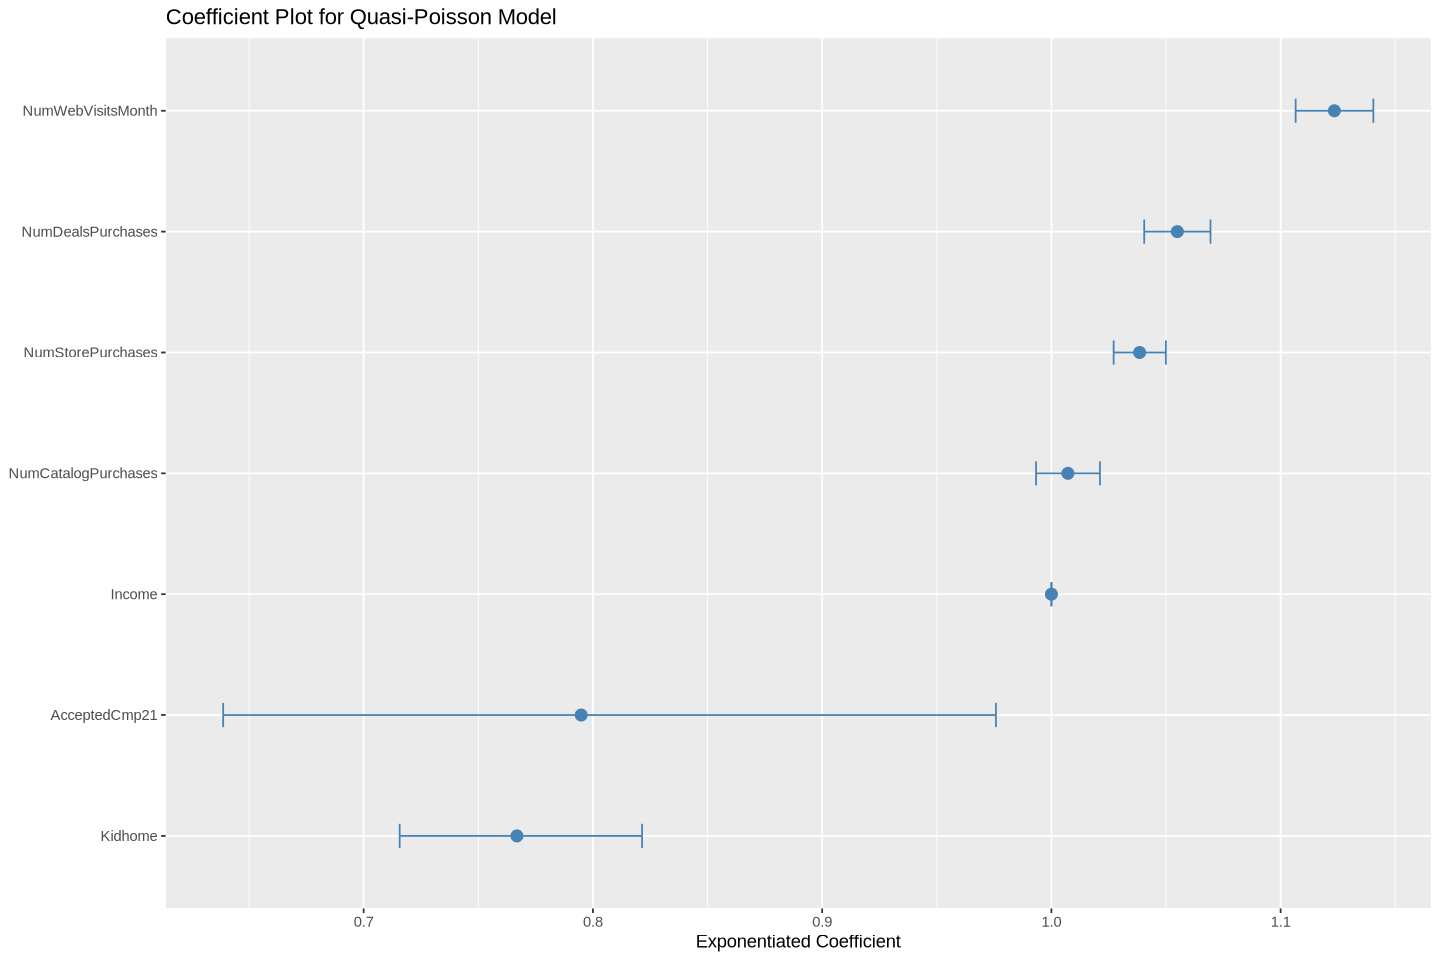

In [17]:
# Contributors: Yupei

# Filter intercept from the tidy model
tidy_model_no_intercept <- tidy_model |>
  filter(term != "(Intercept)")

# Plot coefficient estimates and their 95% confidence intervals
ggplot(
  tidy_model_no_intercept,
  aes(x = estimate, y = reorder(term, estimate))
) +
  geom_point(size = 3, color = "steelblue") +
  geom_errorbarh(
    aes(xmin = conf.low, xmax = conf.high),
    height = 0.2, color = "steelblue"
  ) +
  labs(
    x = "Exponentiated Coefficient",
    y = NULL,
    title = "Coefficient Plot for Quasi-Poisson Model"
  )

In the coefficient plot, each point represents the exponentiated coefficient from the model, showing the multiplicative effect of each predictor on online purchases, with horizontal bars indicating 95% confidence intervals. Variables whose confidence intervals lie entirely above or entirely below 1 indicate a statistically significant association. Those above 1 are associated with a multiplicative increase in the number of online purchases, while those lying below 1 suggest a decrease. 

<!-- In 3 or 4 sentences give a brief interpretation of the results. If needed, comment on any unexpected result or potential problems with the analysis, and possible ways to address issues encountered. If results are as expected, explain how they address the question of interest. 


Summarize what you found and the implications/impact of your findings.
If relevant, discuss whether your results were what you expected to find.
Discuss how your model could be improved;
Discuss future questions/research this study could lead to.
-->

# Discussion

### Summary
Our additive poisson regression model explores the relationship between customer characteristics and activity within the company to the number of web purchases they make. The results show that not all covariates were significant at a 5% level, specifically `NumCatalogPurchases`, which does not appear to significantly influence the number of web purchases. This may have occured because the stepwise selection algorithm overfit to the training data.

From the significant covariates, **having kids at home** is associated with a reduction in web purchases. Specifically, having one additional kid at home is associated with a decrease in the mean number of web purchases someone makes by (1-0.7668721)*100 = 23.31279%. A possible explanation for this is that parents with children may prefer in-store shopping over online purchases for convenience and letting their children enjoy the actual shopping experience.

On the other hand, **income, number of deals purchased, number of store purchases, number of website visits per month**, and **if they accepted Campaign 2,** are positively associated with the web purchases. One interpretation is that one more website visit per month is associated with an increase in the mean number of web purchases someone makes by a factor of 1.12. This makes sense as higher exposure to an online store likely increases the chances of making a web purchase. Similarly, higher-income customers tend to make more purchases, reinforcing the idea that disposable income plays a crucial role in online shopping behavior.

### Implications
This study provides actionable insights for companies looking to optimize their e-commerce strategies. Since more website visits is associated with more purchases, companies might consider target advertisements towards their webpage, enhancing their current web ordering system, or including promotions that encourage repeated website visits. The importance of high income level suggests that businesses can consider tailoring loyalty programs or special products to high-income consumers. 

The negative association between kids and web purchases means businesses may consider exploring family-oriented marketing strategies to offer hybrid shopping experiences to boost both web purchases and enhance child shopping experiences with in-person shopping. 

### Model Limitations and Improvements
Since we used an additive poisson regression model, we overlooked potential interaction effects between variables, which could affect the model’s explanatory power. Adding interaction effects may offer the model better explanatory power, although it would be more at risk of overfitting which would hopefully be ruled out through regularization. As the data was collected through an observational study, there is a huge risk of confounding variables not included in our analysis, such as seasonality, advertising exposure, and indivdual shopping habits. Running a controlled experiment may help isolate these effects, although it would raise ethical concerns related to customer purchasing.

### Future Research Directions
A direction that could be taken after this study is to explore customer segmentation to understand the distinct customers a business has to allow for more targetted marketing strategies, through the use of clustering. Another avenue of interest might be to explore time series data and customer churn/retention based on purchasing frequency over time. One might also consider ethical concerns and fairness studies related to model biases and privacy implications on the use of customer data.

# References

Patel, A. (2021, August 22). Customer personality analysis. Kaggle. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data 

Plouffe, C. R., Bolander, W., & Cote, J. A. (2016). Which influence tactics lead to sales performance? Journal of Marketing Research, 53(2), 317-332.

Rodriguez-Serrano, J. (2025, January 20). The Importance of Data-Driven Decision-Making. Esade. [https://www.esade.edu/beyond/en/the-importance-of-data-driven-decision-making/#:~:text=Data%2Ddriven%20decision%2Dmaking%20(,minimize%20risks%20and%20maximize%20opportunities.](https://www.esade.edu/beyond/en/the-importance-of-data-driven-decision-making/#:~:text=Data%2Ddriven%20decision%2Dmaking%20(,minimize%20risks%20and%20maximize%20opportunities.)